# ECON3203: Kindergarten Environment & Achievements

## 1. Load and Inspect Data

In [ ]:
import pandas as pd
# load data
sample_url="https://drive.google.com/uc?export=download&id=1ekCjJOTjGD0OASErwVnwhJuPD0hFfCEF"
out_url=sample_url
db_sample = pd.read_csv(sample_url)
db_out = pd.read_csv(out_url)

try:
    from IPython.display import display
    display(db_sample.head())
    display(db_out.head())
except Exception:
    print("Data Error")

,score_read,score_math,gender,birth,lunch,ethnicity,class_type,school,degree,ladder,experience,t_ethnicity,schooldistrict_id,school_id
0,474.0,602.0,male,1980 Q2,free,cauc,small,rural,master,level1,6.0,cauc,36.0,72.0
1,403.0,434.0,male,1980 Q3,free,afam,small,rural,bachelor,apprentice,1.0,cauc,24.0,57.0
2,455.0,520.0,male,1980 Q2,non-free,cauc,regular+aide,suburban,bachelor,level1,5.0,afam,22.0,51.0
3,405.0,454.0,female,1979 Q4,free,cauc,regular+aide,rural,bachelor,level1,11.0,cauc,4.0,6.0
4,433.0,473.0,female,1980 Q3,non-free,cauc,regular,rural,bachelor,level1,2.0,cauc,40.0,76.0


,score_read,score_math,gender,birth,lunch,ethnicity,class_type,school,degree,ladder,experience,t_ethnicity,schooldistrict_id,school_id
0,474.0,602.0,male,1980 Q2,free,cauc,small,rural,master,level1,6.0,cauc,36.0,72.0
1,403.0,434.0,male,1980 Q3,free,afam,small,rural,bachelor,apprentice,1.0,cauc,24.0,57.0
2,455.0,520.0,male,1980 Q2,non-free,cauc,regular+aide,suburban,bachelor,level1,5.0,afam,22.0,51.0
3,405.0,454.0,female,1979 Q4,free,cauc,regular+aide,rural,bachelor,level1,11.0,cauc,4.0,6.0
4,433.0,473.0,female,1980 Q3,non-free,cauc,regular,rural,bachelor,level1,2.0,cauc,40.0,76.0


## 2. Column Name Normalisation Utilities

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re

def to_snake(s):
    s = s.lower()
    s = re.sub(r'[^0-9a-z]+', '_', s)
    s = re.sub(r'_+', '_', s)
    s = s.strip('_')
    return s

def normalise_columns(df):
    out = df.copy()
    out.columns = [to_snake(c) for c in out.columns]
    return out

db_sample = normalise_columns(db_sample)
db_out    = normalise_columns(db_out)

def find_col(df, *aliases):
    cols = set(df.columns)
    for a in aliases:
        if a in cols:
            return a
    raise KeyError(f"None of {aliases} found in columns={sorted(df.columns)}")

score_read_col = find_col(db_sample, "score_read", "read_score", "read", "scoreread", "score_read_i", "score_read_i_")
score_math_col = find_col(db_sample, "score_math", "math_score", "math", "scoremath", "score_math_i", "score_math_i_")

## 3. Exploratory Data Analysis (EDA)


=== BASIC INFO (db_sample) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   score_read         4643 non-null   float64
 1   score_math         4706 non-null   float64
 2   gender             5060 non-null   object 
 3   birth              5055 non-null   object 
 4   lunch              5039 non-null   object 
 5   ethnicity          5059 non-null   object 
 6   class_type         5060 non-null   object 
 7   school             5060 non-null   object 
 8   degree             5041 non-null   object 
 9   ladder             4549 non-null   object 
 10  experience         5041 non-null   float64
 11  t_ethnicity        5008 non-null   object 
 12  schooldistrict_id  5060 non-null   float64
 13  school_id          5060 non-null   float64
dtypes: float64(5), object(9)
memory usage: 553.6+ KB
None

=== DESCRIPTIVE STATS (db_sample)

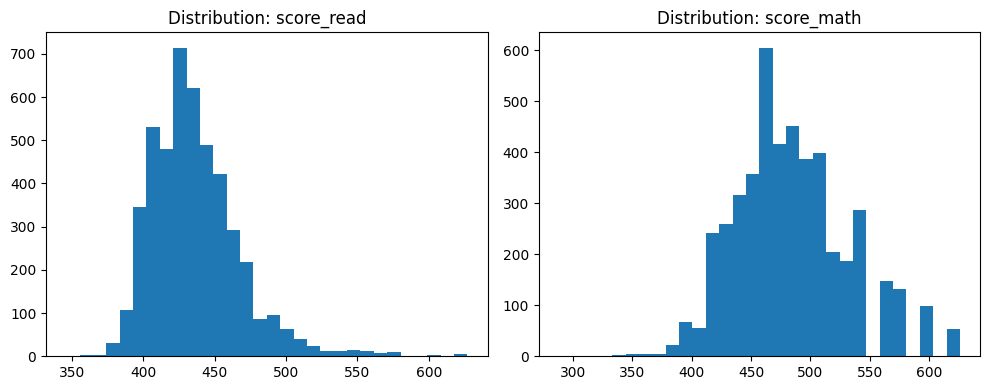

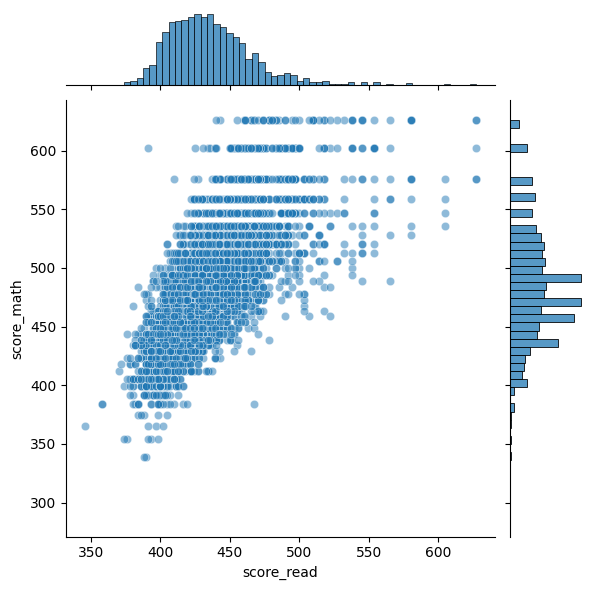


Pearson correlation: 0.708


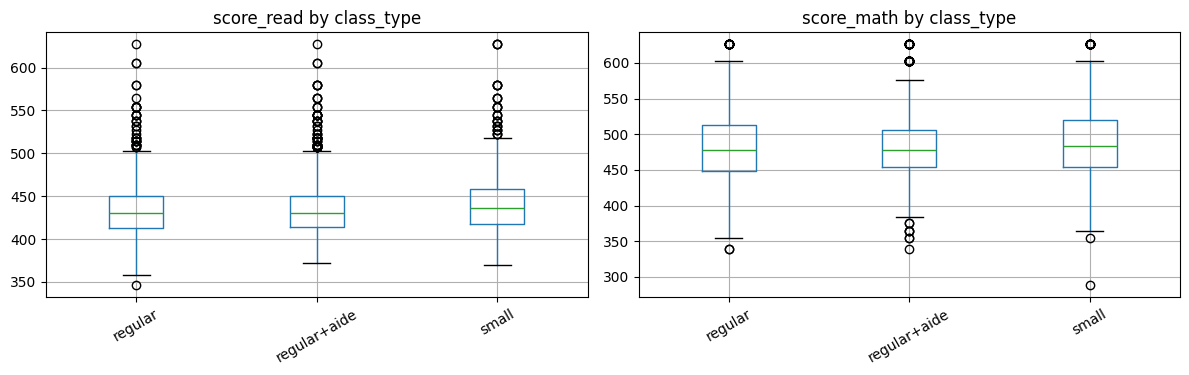

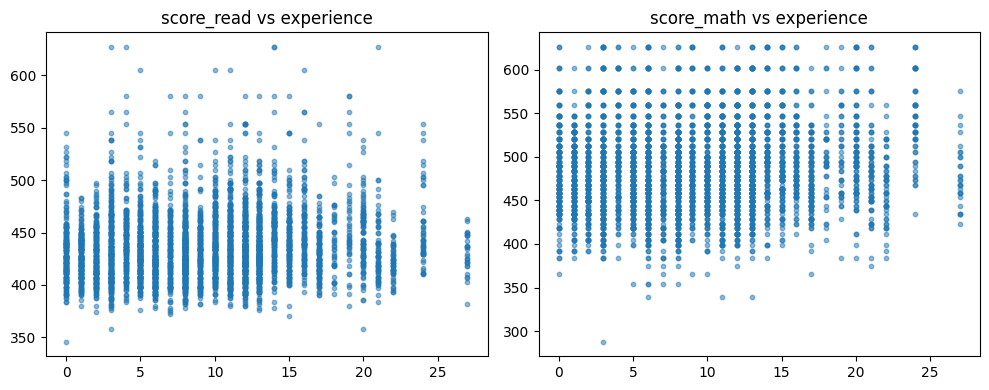

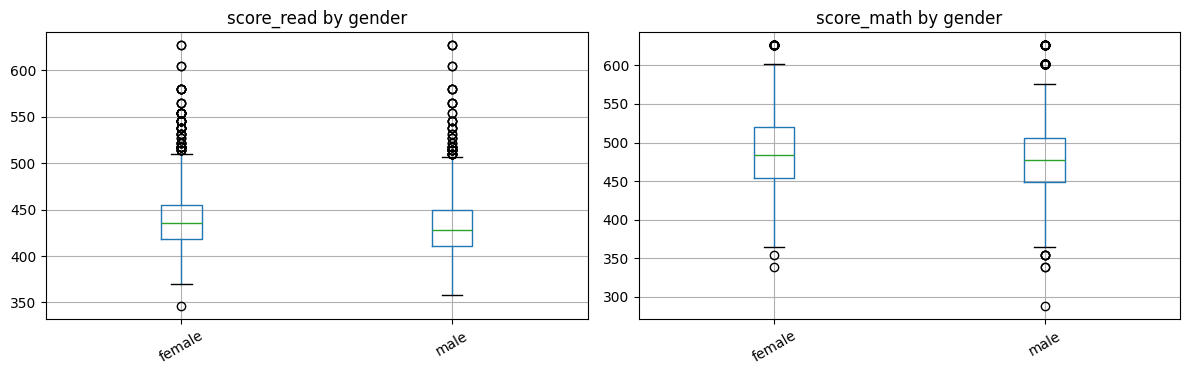

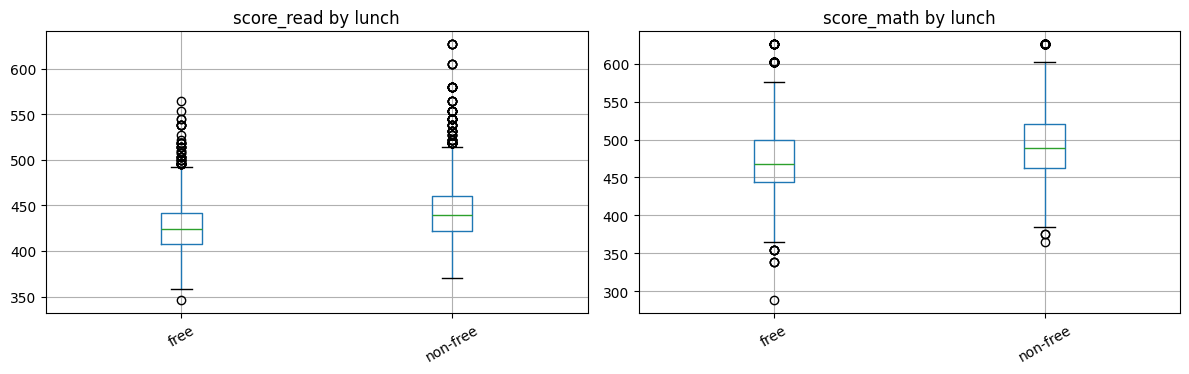

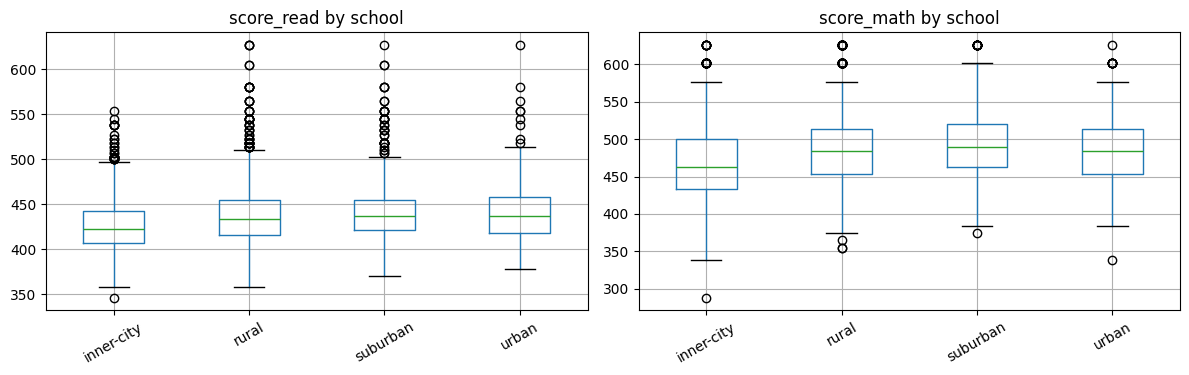

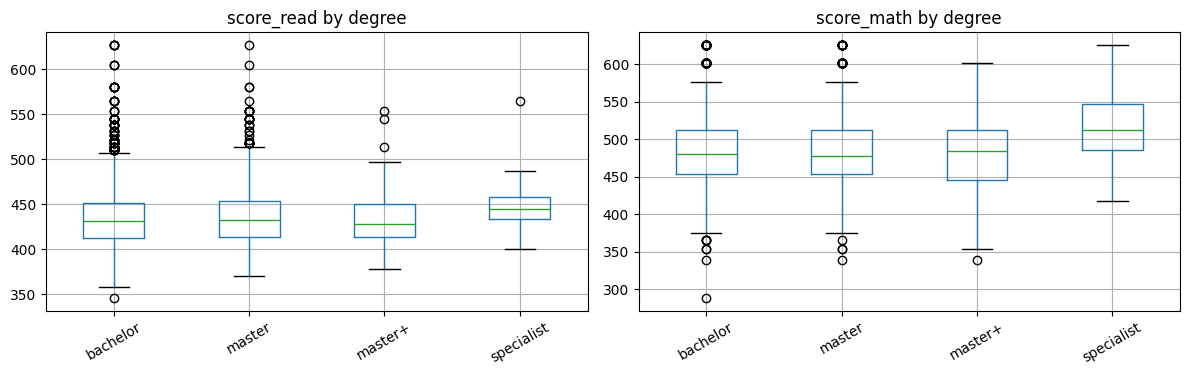

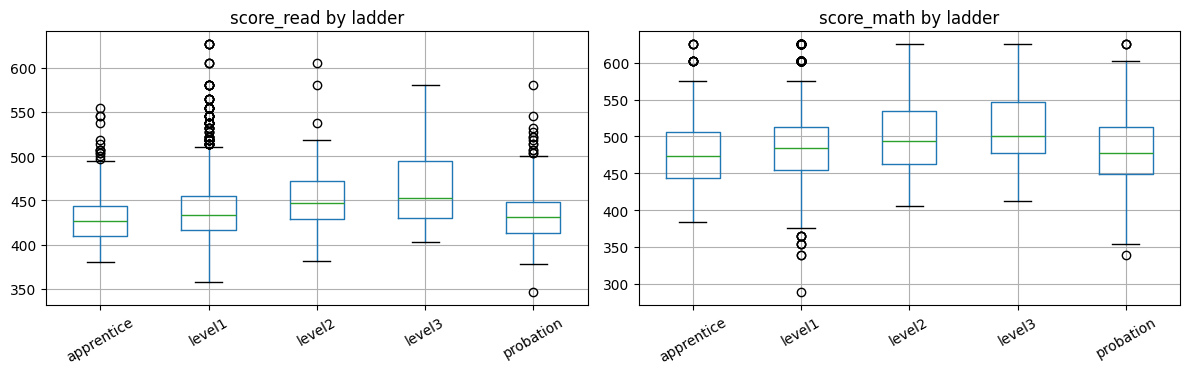

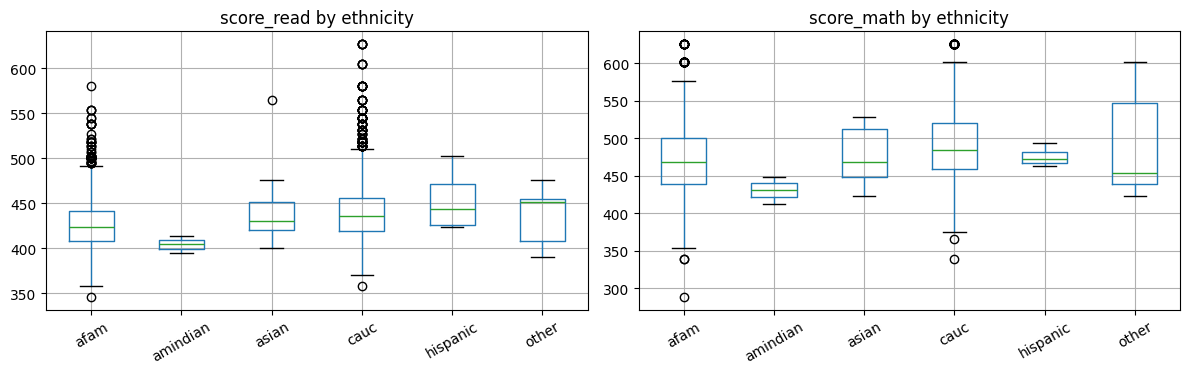

In [ ]:
import seaborn as sns

print("\n=== BASIC INFO (db_sample) ===")
print(db_sample.info())
print("\n=== DESCRIPTIVE STATS (db_sample) ===")
print(db_sample.describe(include='all').transpose())

def missing_table(df):
    mis = df.isna().sum()
    pct = (mis / len(df)) * 100
    return pd.DataFrame({"missing": mis, "missing_%": pct}).sort_values("missing_%", ascending=False)

print("\n=== Missingness (db_sample) ===")
print(missing_table(db_sample).head(30))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(db_sample[score_read_col].dropna(), bins=30)
axes[0].set_title(f"Distribution: {score_read_col}")
axes[1].hist(db_sample[score_math_col].dropna(), bins=30)
axes[1].set_title(f"Distribution: {score_math_col}")
plt.tight_layout(); plt.show()

sns.jointplot(data=db_sample, x="score_read", y="score_math", kind="scatter", height=6, alpha=0.5)
plt.show()

corr = db_sample[["score_read", "score_math"]].corr().iloc[0, 1]
print("\nPearson correlation:", round(corr, 3))

candidate_bivariates = [
    "class_type", "experience", "gender", "lunch", "school", "degree", "ladder", "ethnicity"
]
for col in candidate_bivariates:
    if col in db_sample.columns:
        if np.issubdtype(db_sample[col].dropna().dtype, np.number):
            fig, ax = plt.subplots(1,2, figsize=(10,4))
            ax[0].scatter(db_sample[col], db_sample[score_read_col], s=10, alpha=0.5)
            ax[0].set_title(f"{score_read_col} vs {col}")
            ax[1].scatter(db_sample[col], db_sample[score_math_col], s=10, alpha=0.5)
            ax[1].set_title(f"{score_math_col} vs {col}")
            plt.tight_layout(); plt.show()
        else:
            fig, ax = plt.subplots(1,2, figsize=(12,4))
            db_sample.boxplot(column=score_read_col, by=col, ax=ax[0], rot=30)
            ax[0].set_title(f"{score_read_col} by {col}")
            ax[0].set_xlabel("")
            db_sample.boxplot(column=score_math_col, by=col, ax=ax[1], rot=30)
            ax[1].set_title(f"{score_math_col} by {col}")
            ax[1].set_xlabel("")
            plt.suptitle("")
            plt.tight_layout(); plt.show()

## Correlation Matrix

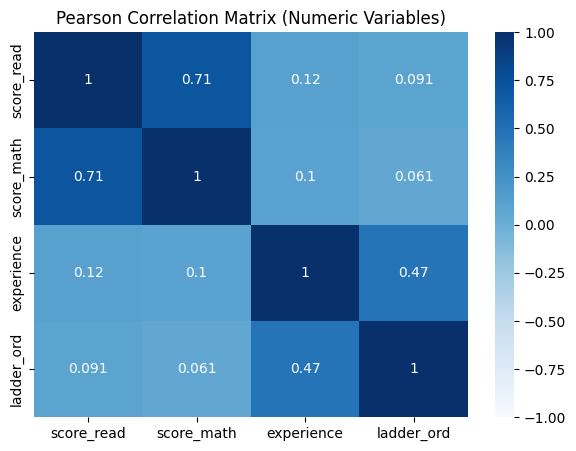

In [ ]:
ladder_order = {
    "probation": 1,
    "apprentice": 2,
    "level1": 3,
    "level2": 4,
    "level3": 5
}
db_sample["ladder_ord"] = db_sample["ladder"].map(ladder_order)

num_vars = ["score_read", "score_math", "experience", "ladder_ord"]

cat_vars = [
    "gender", "ethnicity", "lunch", "class_type",
    "school", "degree", "t_ethnicity"
]

plt.figure(figsize=(7, 5))
corr = db_sample[num_vars].corr()
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix (Numeric Variables)")
plt.show()

Means of scores by gender
        score_read  score_math
gender                        
female      439.31      489.11
male        433.38      481.33


Means of scores by ethnicity
           score_read  score_math
ethnicity                        
afam           428.43      473.37
amindian       404.50      430.50
asian          444.36      477.55
cauc           439.98      490.84
hispanic       453.75      475.75
other          436.00      493.00


Means of scores by lunch
          score_read  score_math
lunch                           
free          427.49      473.28
non-free      444.58      496.32


Means of scores by class_type
              score_read  score_math
class_type                          
regular           434.43      482.83
regular+aide      435.04      482.81
small             439.88      490.53


Means of scores by school
            score_read  score_math
school                            
inner-city      427.54      470.92
rural           437.22      487.94
sub

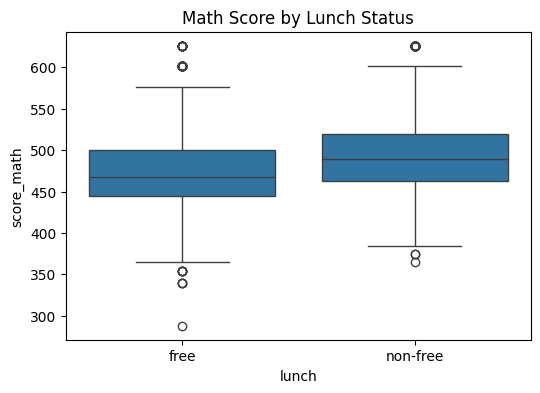

In [ ]:
for cat in cat_vars:
    print("=" * 60)
    print(f"Means of scores by {cat}")
    print(db_sample.groupby(cat)[["score_read", "score_math"]].mean().round(2))
    print("\n")

plt.figure(figsize=(6,4))
sns.boxplot(data=db_sample, x="lunch", y="score_math")
plt.title("Math Score by Lunch Status")
plt.show()


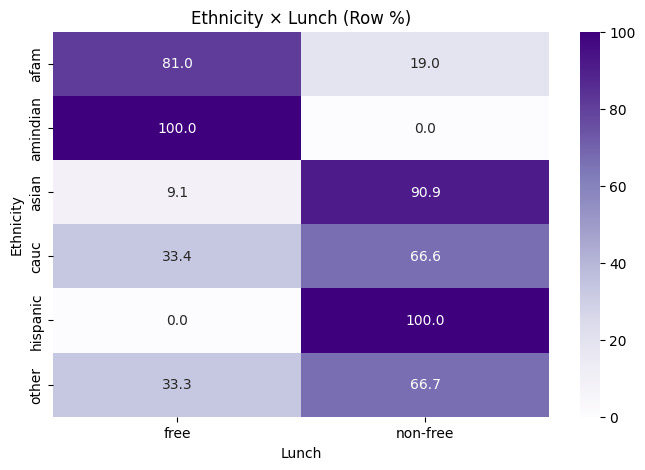

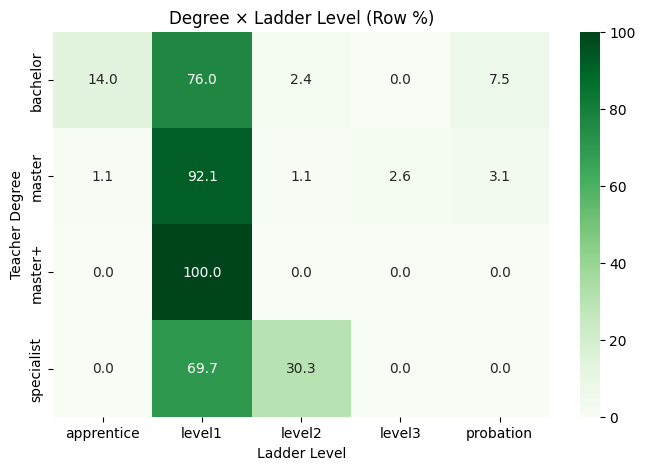

In [ ]:
ct = pd.crosstab(db_sample["ethnicity"], db_sample["lunch"], normalize='index') * 100
plt.figure(figsize=(8,5))
sns.heatmap(ct, annot=True, fmt=".1f", cmap="Purples")
plt.title("Ethnicity × Lunch (Row %)")
plt.xlabel("Lunch")
plt.ylabel("Ethnicity")
plt.show()

ct2 = pd.crosstab(db_sample["degree"], db_sample["ladder"], normalize='index') * 100
plt.figure(figsize=(8,5))
sns.heatmap(ct2, annot=True, fmt=".1f", cmap="Greens")
plt.title("Degree × Ladder Level (Row %)")
plt.xlabel("Ladder Level")
plt.ylabel("Teacher Degree")
plt.show()

## 4. Train/Validation Split and Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

TARGETS = [score_read_col, score_math_col]
X = db_sample.drop(columns=TARGETS)
y = db_sample[TARGETS].copy()

numeric_features = [c for c in X.columns if np.issubdtype(X[c].dropna().dtype, np.number)]
categorical_features = [c for c in X.columns if c not in numeric_features]

print("\nNumeric features:", numeric_features[:20])
print("Categorical features:", categorical_features[:20])

y = db_sample[[score_read_col, score_math_col]].copy()
mask = y.notna().all(axis=1)
X = db_sample.loc[mask].drop(columns=[score_read_col, score_math_col])
y = y.loc[mask]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

numeric_pipe = [
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
]

categorical_pipe = [
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("oh", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(numeric_pipe), numeric_features),
        ("cat", Pipeline(categorical_pipe), categorical_features)
    ],
    remainder="drop"
)


Numeric features: ['experience', 'schooldistrict_id', 'school_id', 'ladder_ord']
Categorical features: ['gender', 'birth', 'lunch', 'ethnicity', 'class_type', 'school', 'degree', 'ladder', 't_ethnicity']


## 5. Custom Scorer: $MSE_o$

In [ ]:
import numpy as np

def mse_o(y_true, y_pred):
    if hasattr(y_true, "values"):
        y_true = y_true.values
    if hasattr(y_pred, "values"):
        y_pred = y_pred.values

    y_true = np.atleast_2d(y_true)
    y_pred = np.atleast_2d(y_pred)

    if y_true.shape[0] != y_pred.shape[0]:
        y_true = y_true.T if y_true.shape[1] == y_pred.shape[0] else y_true

    if y_true.shape[1] < 2:
        raise ValueError(f"Expected 2 targets, got shape {y_true.shape}")

    err = (y_pred - y_true) ** 2
    mse_o_value = np.mean(0.5 * (err[:, 0] + err[:, 1]))
    return mse_o_value

from sklearn.metrics import make_scorer
mse_o_scorer = make_scorer(mse_o, greater_is_better=False)

## 6. Models (OLS, Ridge, Lasso, ElasticNet, RF, GBR, MLP)

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score

models = {}

models["ols_sklearn"] = Pipeline([
    ("pp", preprocess),
    ("reg", LinearRegression())
])

models["ridge_cv"] = Pipeline([
    ("pp", preprocess),
    ("reg", RidgeCV(alphas=np.logspace(-3, 3, 13)))
])

models["lasso_cv"] = Pipeline([
    ("pp", preprocess),
    ("reg", MultiOutputRegressor(LassoCV(alphas=np.logspace(-3,1,20), max_iter=20000)))
])

models["elasticnet_cv"] = Pipeline([
    ("pp", preprocess),
    ("reg", MultiOutputRegressor(ElasticNetCV(l1_ratio=[0.2,0.5,0.8,0.95,1.0], alphas=np.logspace(-3,1,20), max_iter=20000)))
])

models["rf"] = Pipeline([
    ("pp", preprocess),
    ("reg", MultiOutputRegressor(RandomForestRegressor(
        n_estimators=400, random_state=42, n_jobs=-1
    )))
])

models["gbr"] = Pipeline([
    ("pp", preprocess),
    ("reg", MultiOutputRegressor(GradientBoostingRegressor(
        n_estimators=400, learning_rate=0.05, max_depth=3, random_state=42
    )))
])

models["mlp"] = Pipeline([
    ("pp", preprocess),
    ("reg", MultiOutputRegressor(MLPRegressor(
        hidden_layer_sizes=(128,64), activation="relu", alpha=1e-4,
        learning_rate_init=1e-3, max_iter=400, random_state=42
    )))
])

## 7. Cross-Validation and Model Selection

In [ ]:
cv_results = {}
for name, pipe in models.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring=mse_o_scorer, n_jobs=-1)
    cv_results[name] = {
        "cv_mean_mse_o": -scores.mean(),
        "cv_std_mse_o":  scores.std()
    }
    print(f"{name:14s}  CV MSE_o mean={-scores.mean():.6f}  std={scores.std():.6f}")

best_name = min(cv_results.keys(), key=lambda k: cv_results[k]["cv_mean_mse_o"])
print("\nSelected best model by CV MSE_o:", best_name, cv_results[best_name])

best_model = models[best_name]
best_model.fit(X_train, y_train)
y_valid_pred = best_model.predict(X_valid)
valid_mse_o = mse_o(y_valid.values, y_valid_pred)
print(f"Validation MSE_o for {best_name}: {valid_mse_o:.6f}")

ols_sklearn     CV MSE_o mean=1457.475922  std=38.245616
ridge_cv        CV MSE_o mean=1451.313212  std=36.476198
lasso_cv        CV MSE_o mean=1453.497999  std=36.518033
elasticnet_cv   CV MSE_o mean=1451.771531  std=36.471374
rf              CV MSE_o mean=1362.654315  std=44.708494
gbr             CV MSE_o mean=1207.789529  std=23.060243
mlp             CV MSE_o mean=1426.417420  std=33.686616

Selected best model by CV MSE_o: gbr {'cv_mean_mse_o': np.float64(1207.7895292780106), 'cv_std_mse_o': np.float64(23.06024279875355)}
Validation MSE_o for gbr: 1159.556273


## 8. Inference and Diagnostics

In [ ]:
import statsmodels.api as sm
import patsy

predictors = [c for c in db_sample.columns if c not in TARGETS]
cat_for_formula = [c for c in predictors if c in categorical_features]
num_for_formula = [c for c in predictors if c in numeric_features]

rhs_parts = num_for_formula + [f"C({c})" for c in cat_for_formula]
rhs = " + ".join(rhs_parts) if rhs_parts else "1"

for tgt in TARGETS:
    formula = f"{tgt} ~ {rhs}"
    try:
        yX = patsy.dmatrices(formula, data=db_sample, return_type="dataframe")
        model_sm = sm.OLS(yX[0], yX[1]).fit(cov_type="HC3")
        print(f"\n=== statsmodels OLS summary for {tgt} ===")
        print(model_sm.summary())
    except Exception as e:
        print(f"\n[Warning] OLS inference for {tgt} failed: {e}")


=== statsmodels OLS summary for score_read ===
                            OLS Regression Results                            
Dep. Variable:             score_read   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                 2.652e+04
Date:                Tue, 02 Dec 2025   Prob (F-statistic):               0.00
Time:                        08:33:56   Log-Likelihood:                -19970.
No. Observations:                4160   AIC:                         4.002e+04
Df Residuals:                    4122   BIC:                         4.026e+04
Df Model:                          37                                         
Covariance Type:                  HC3                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

## 9. Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

try:
    r = permutation_importance(best_model, X_valid, y_valid, scoring=mse_o_scorer, n_repeats=5, random_state=42, n_jobs=-1)
    def get_feature_names(preprocessor):
        names = []
        for name, trans, cols in preprocessor.transformers_:
            if name == 'remainder' and trans == 'drop':
                continue
            if hasattr(trans, 'named_steps'):
                last = list(trans.named_steps.values())[-1]
                if hasattr(last, 'get_feature_names_out'):
                    base = np.array(cols, dtype=object)
                    try:
                        got = last.get_feature_names_out(base)
                    except Exception:
                        got = base
                else:
                    got = cols
            else:
                got = cols
            names.extend(list(got))
        return [str(x) for x in names]

    feat_names = get_feature_names(best_model.named_steps["pp"])
    importances_mean = r.importances_mean
    top_idx = np.argsort(importances_mean)[::-1][:25]
    print("\n=== Permutation importance ===")
    for i in top_idx:
        print(f"{feat_names[i]:40s}  mean Δscore={importances_mean[i]:.6f}")
except Exception as e:
    print(f"\n[Warning] Permutation importance failed: {e}")


=== Permutation importance ===
birth_1979 Q2                             mean Δscore=333.256568
school_id                                 mean Δscore=133.435673
birth_1978 Q3                             mean Δscore=89.383165
schooldistrict_id                         mean Δscore=64.744202
birth_1979 Q1                             mean Δscore=55.243147
ladder_ord                                mean Δscore=54.180718
gender_female                             mean Δscore=38.016741
gender_male                               mean Δscore=33.619319
experience                                mean Δscore=18.193802
birth_1978 Q2                             mean Δscore=9.608744
birth_1979 Q3                             mean Δscore=8.519389
birth_1978 Q1                             mean Δscore=8.485041
birth_1978 Q4                             mean Δscore=7.779877


## 10. Final Model Training and Out-of-Sample Evaluation

---



In [ ]:
from sklearn.metrics import mean_squared_error
best_model_full = models[best_name]
mask = db_sample[TARGETS].notna().all(axis=1)
best_model_full.fit(db_sample.loc[mask].drop(columns=TARGETS),
                    db_sample.loc[mask, TARGETS])

db_out["ladder_ord"] = db_out["ladder"].map(ladder_order)

X_out = db_out.drop(columns=TARGETS, errors="ignore")
pred_out = best_model_full.predict(X_out)

if all(t in db_out.columns for t in TARGETS):
    y_out = db_out[TARGETS]
    mask = y_out.notna().all(axis=1)
    mse_out = mean_squared_error(y_out.loc[mask], pred_out[mask])
else:
    mse_out = np.nanmean(pred_out)

print("=== FINAL OUTPUT ===")
print(mse_out)

=== FINAL OUTPUT ===
1044.1488407749491


## 11. Model Accuracy Plots




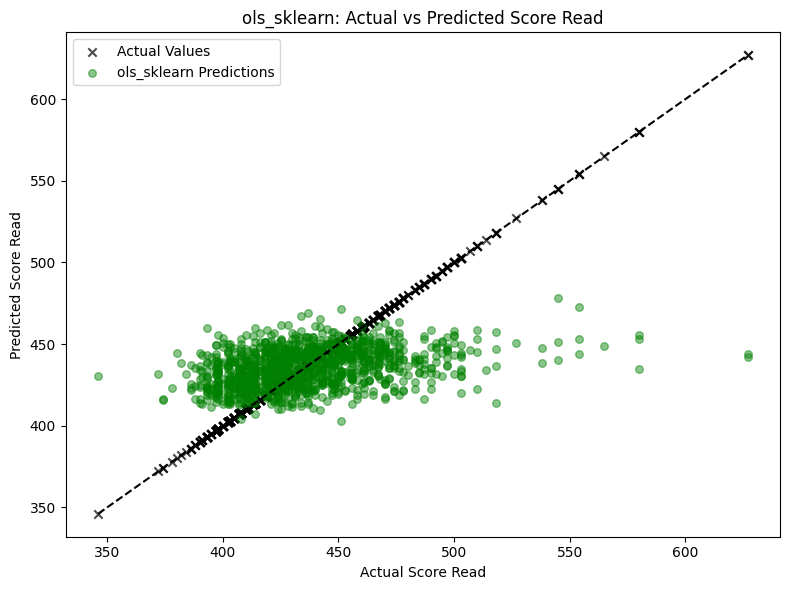

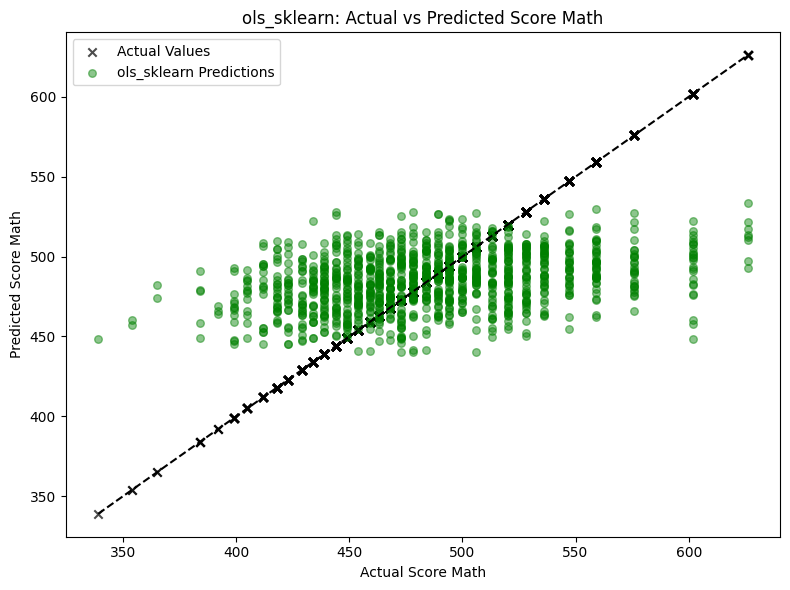

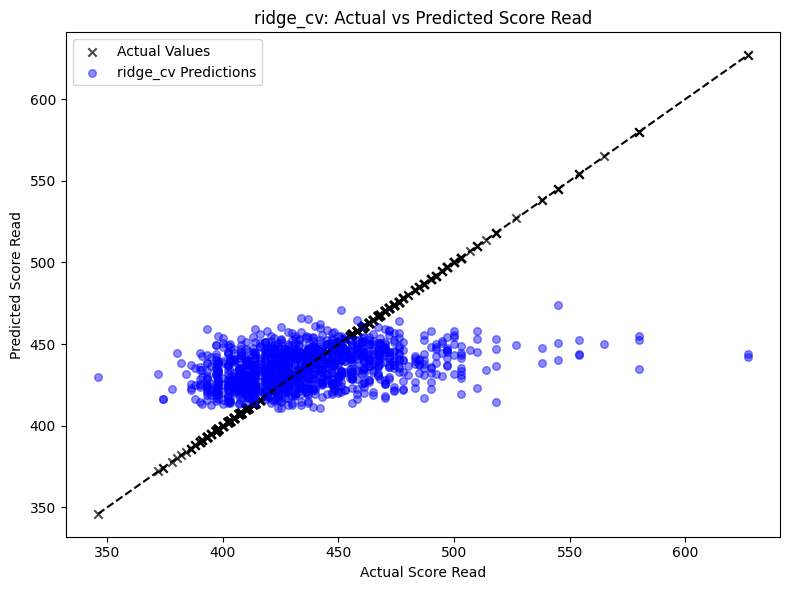

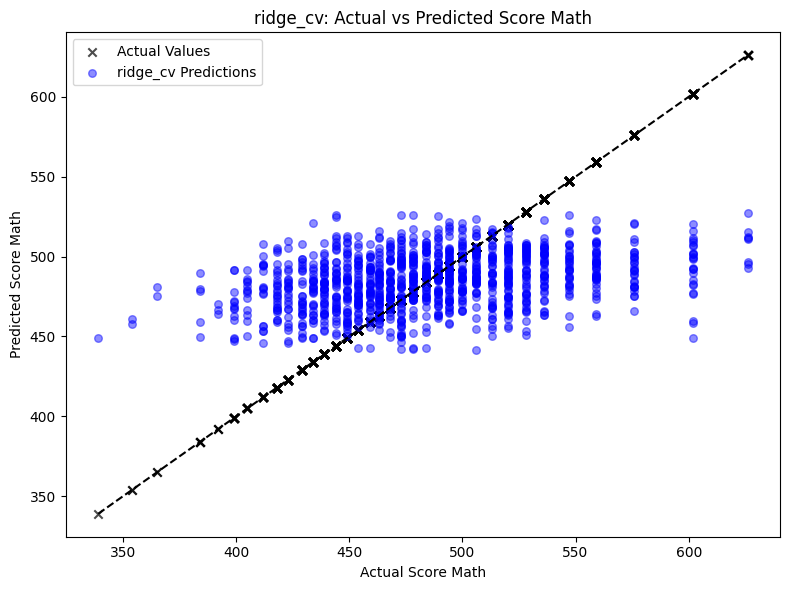

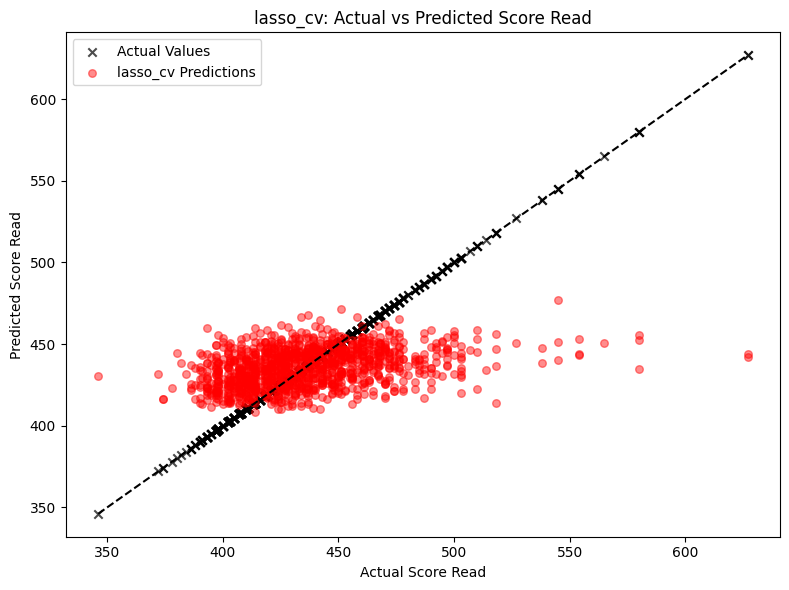

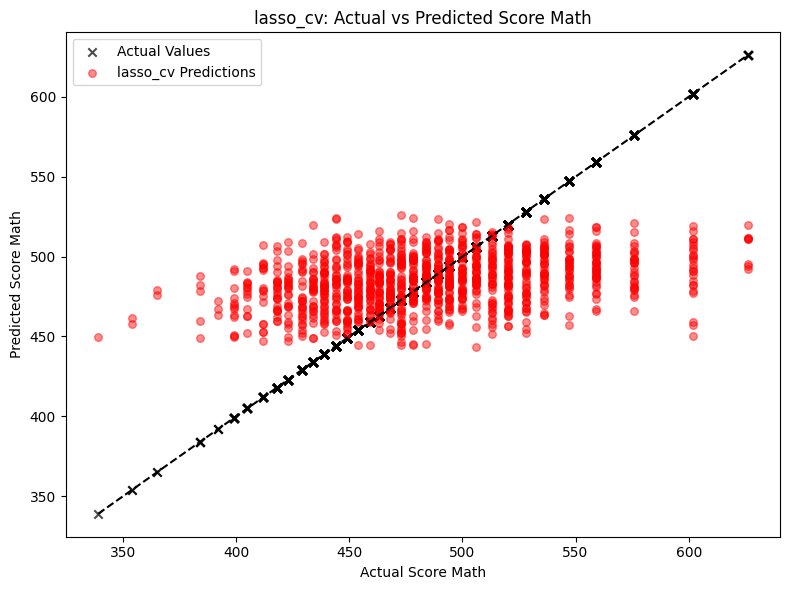

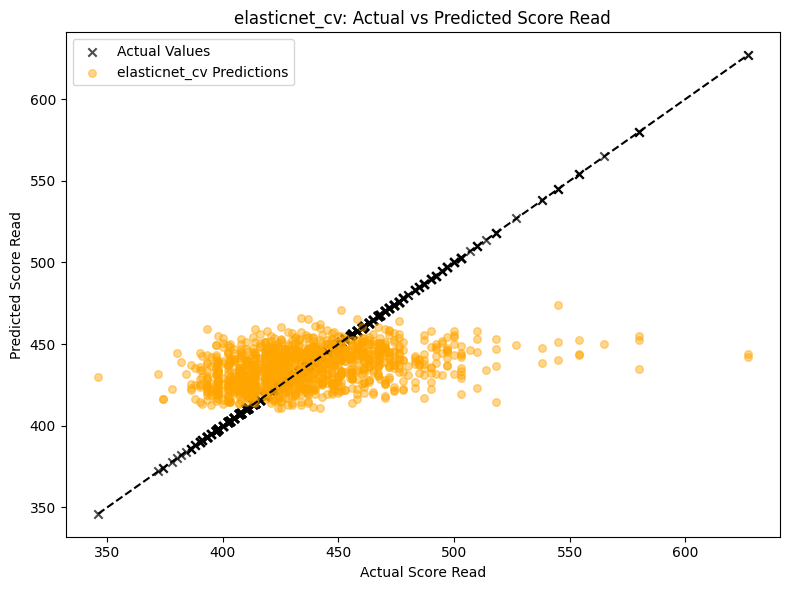

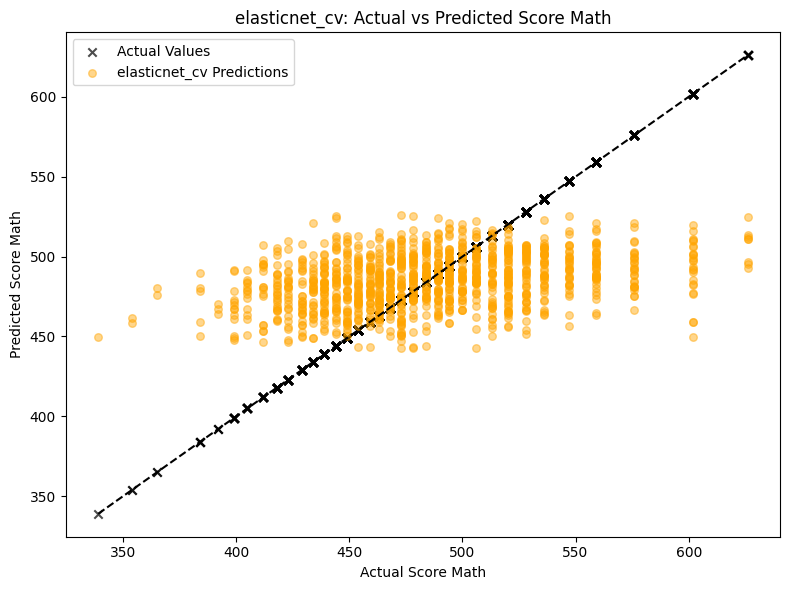

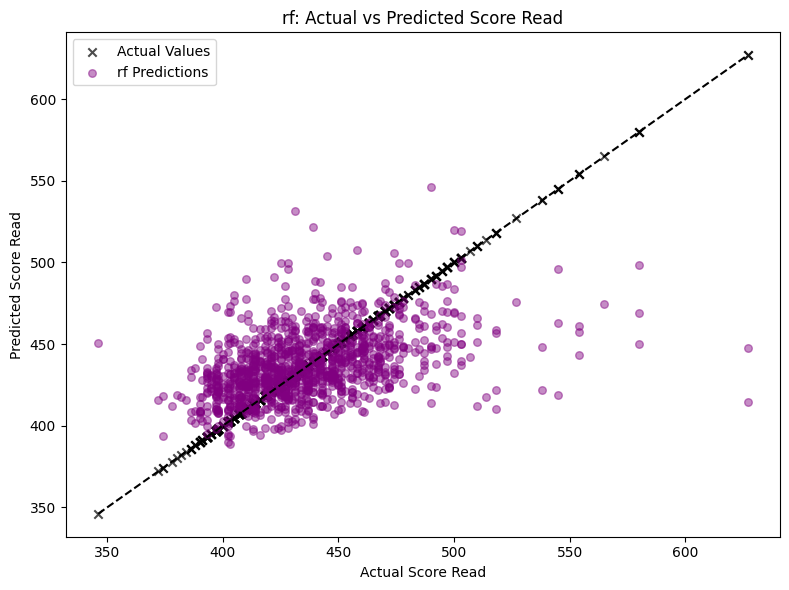

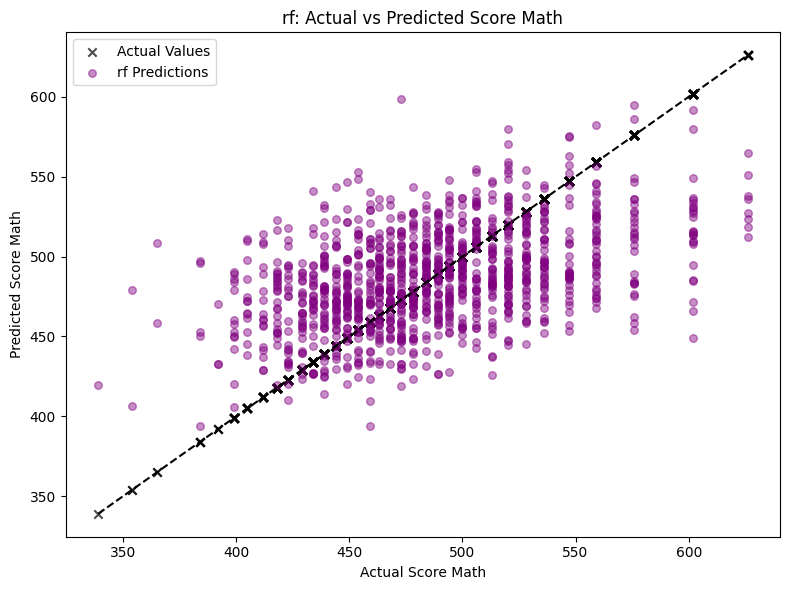

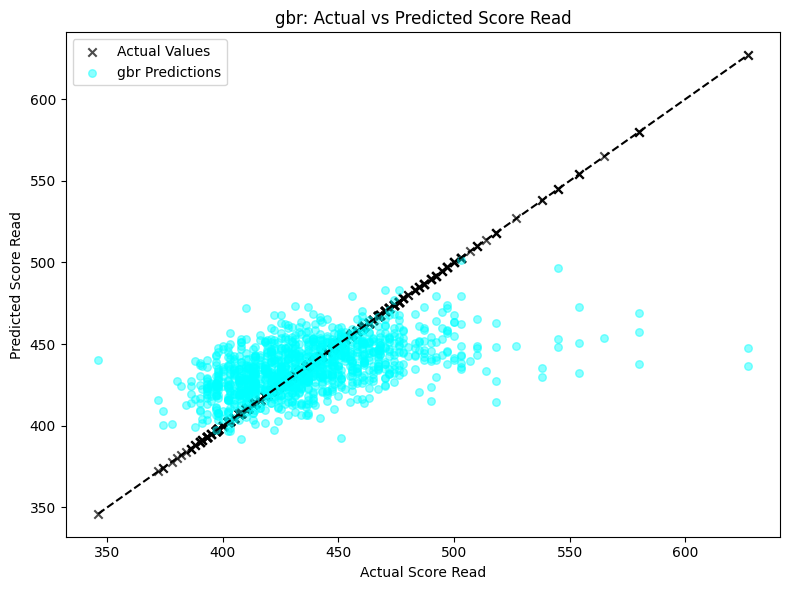

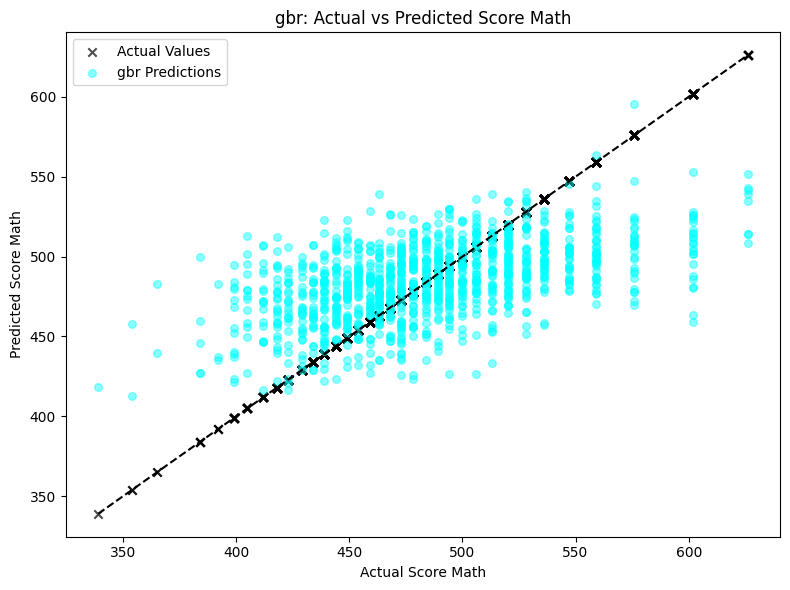

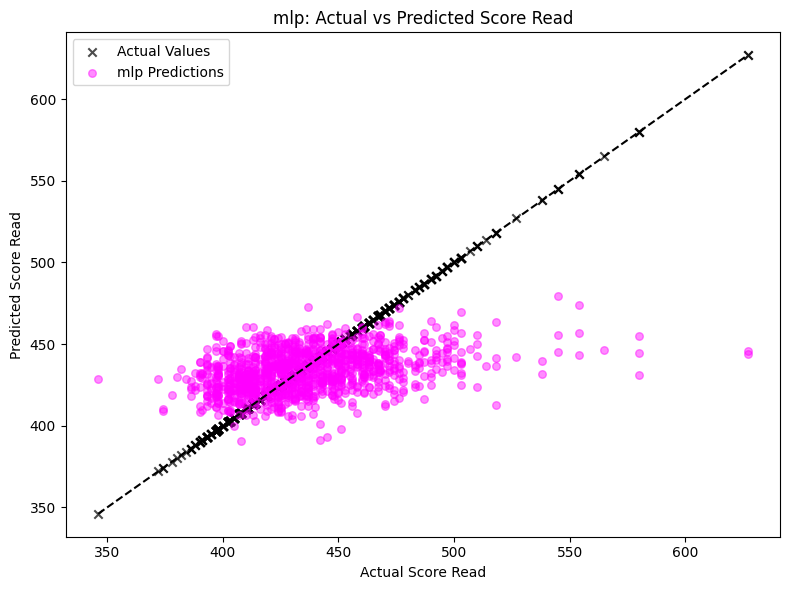

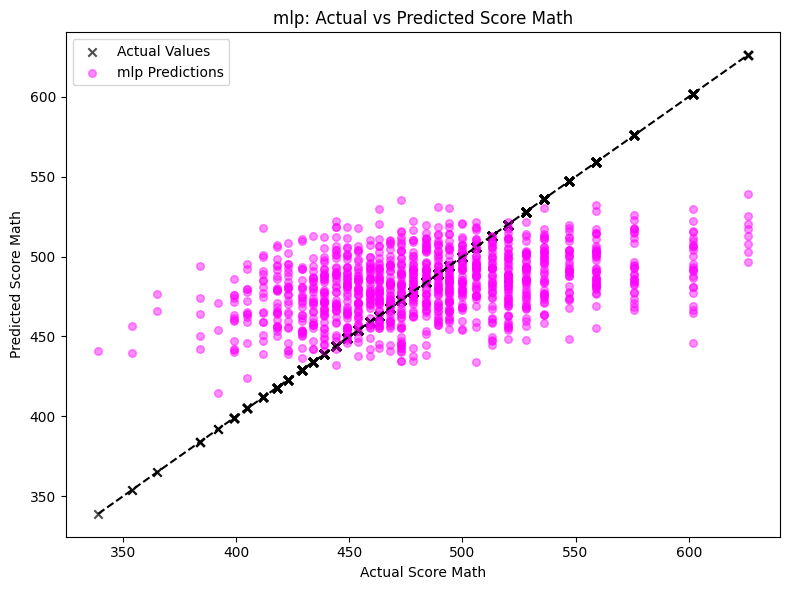

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import itertools

y_true = y_valid.values

score_names = [score_read_col, score_math_col]

model_colours = itertools.cycle([
    "green", "blue", "red", "orange", "purple",
    "cyan", "magenta", "brown", "lime", "pink"
])

def pretty(s):
    return s.replace("_", " ").title()

for model_name, pipe in models.items():

    colour = next(model_colours)

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_valid)

    for target_idx, colname in enumerate(score_names):

        actual = y_true[:, target_idx]
        pred   = y_pred[:, target_idx]

        plt.figure(figsize=(8, 6))

        plt.scatter(actual, actual,
                    color="black",
                    alpha=0.7,
                    marker="x",
                    label="Actual Values")

        plt.scatter(actual, pred,
                    color=colour,
                    alpha=0.45,
                    s=30,
                    label=f"{model_name} Predictions")

        min_val = min(actual.min(), pred.min())
        max_val = max(actual.max(), pred.max())
        plt.plot([min_val, max_val], [min_val, max_val],
                 linestyle="--", color="black")

        nice = pretty(colname)
        plt.title(f"{model_name}: Actual vs Predicted {nice}")
        plt.xlabel(f"Actual {nice}")
        plt.ylabel(f"Predicted {nice}")
        plt.legend()
        plt.tight_layout()
        plt.show()
